## Imports

In [1]:
import numpy as np
import scipy.stats as stats
import scipy
import matplotlib.pyplot as plt

FIGSIZE= (5, 3)

## Problem 2.6

x_star: 0.6449
Total error: 0.2056


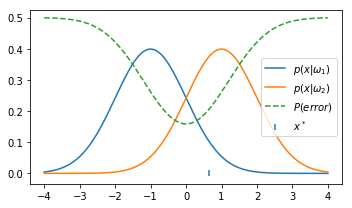

In [2]:
mu1, sigma1= -1, 1
mu2, sigma2= 1, 1

dist1 = stats.norm(loc=mu1, scale=sigma1)
dist2 = stats.norm(loc=mu2, scale=sigma2)
E_1 = 0.05

x_star = mu1 + sigma1 * stats.norm.ppf(1 - E_1)  # ppf = inverse of `cdf`
print(f'x_star: {round(x_star, 4)}')

total_error = 0.5 * (E_1 + stats.norm.cdf((mu1 - mu2)/sigma2 + (sigma1/sigma2) * stats.norm.ppf(1 - E_1)))
print(f'Total error: {round(total_error, 4)}')

x = np.linspace(-4, 4, num=2**8)
bayes_error = 0.5 * ((1 - dist1.cdf(x)) + dist2.cdf(x))

plt.figure(figsize=FIGSIZE)
plt.plot(x, dist1.pdf(x), label='$p(x | \omega_1)$')
plt.plot(x, dist2.pdf(x), label='$p(x | \omega_2)$')
plt.scatter([x_star], [0], label='$x^*$', marker='|')
plt.plot(x, bayes_error, '--', label='$P(error)$')
plt.legend()
plt.tight_layout()
plt.savefig('duda_ch2_prob6.pdf')

## Problem 4.3

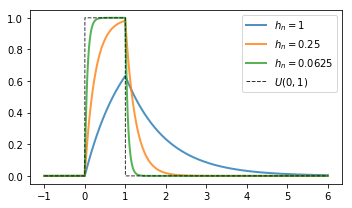

In [3]:
def p_bar(x, a, h_n):
    """
    Function to plot the average p_bar(x),
    given the three cases from the problem.
    """
    y = np.zeros_like(x)
    mask = (0 <= x) & (x <= a)
    y[mask] = ((1 - np.exp(-x / h_n)) /a)[mask]
    
    mask = x >= a
    y[mask] = ((np.exp(a / h_n) - a) * np.exp(-x / h_n) /a)[mask]
    return y

def U(x, a):
    """
    Plot uniform distribution on 0 <= x <= a.
    """
    y = np.zeros_like(x)
    mask = (0 <= x) & (x <= a)
    y[mask] = (np.ones_like(x)/a)[mask]
    return y
    
    
plt.figure(figsize=FIGSIZE) 

x = np.linspace(-1, 6, num=2**14)
for h_n in [1, 1/4, 1/16]:
    plt.plot(x, p_bar(x, a=1, h_n=h_n), label=f'$h_n = {h_n}$', lw=2, alpha=0.8)
    
plt.plot(x, U(x, a=1), 'k--', label=f'$U(0, 1)$', lw=1, alpha=0.8)
plt.legend()
plt.tight_layout()
plt.savefig('duda_ch4_prob3_b.pdf')

/home/tommy/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: RuntimeWarning: overflow encountered in multiply
  # This is added back by InteractiveShellApp.init_path()


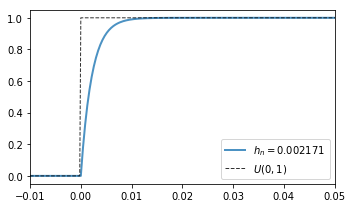

In [4]:
plt.figure(figsize=FIGSIZE) 

a = 1
h_n = a/(100 * np.log(100))

x = np.linspace(-1, 6, num=2**15)
plt.plot(x, p_bar(x, a=a, h_n=h_n), label=f'$h_n = {round(h_n, 6)}$', lw=2, alpha=0.8)
    
plt.plot(x, U(x, a=1), 'k--', label=f'$U(0, 1)$', lw=1, alpha=0.8)
plt.legend()
plt.xlim([-0.01, 0.05])
plt.tight_layout()
plt.savefig('duda_ch4_prob3_d.pdf')

## Problem 4.27

In [5]:
def tantimoto(a:set, b:set) -> float:
    """
    The tantimoto metric of two sets.
    """
    if not isinstance(a, set):
        a = set(a)
    if not isinstance(b, set):
        b = set(b)
    
    s = len(a) + len(b)
    len_inersection = len(a.intersection(b))
    
    return (s - 2 * len_inersection) / (s - len_inersection)


import itertools

tantimoto(set('abc'), set('sdf'))

words = ['pattern', 'pat', 'pots', 'stop', 'taxonomy', 'elementary']

for w1, w2 in sorted(itertools.combinations(words, 2), key=lambda t: tantimoto(*t)):
    print(w1, w2, tantimoto(w1, w2))
    #print('\\texttt{' + f'{w1}' + '}' + ' & \\texttt{' + f'{w2}' + '}' + f' &  {round(tantimoto(w1, w2), 3)} \\\ ')
    
for w1, w2, w3 in itertools.permutations(words, 3):
    
    if not (tantimoto(w1, w3) <= (tantimoto(w1, w2) + tantimoto(w2, w3))):
        print('Triangle inequality not obeyed for:')
        print(w1, w2, w3)

pots stop 0.0
pattern elementary 0.4444444444444444
pattern pat 0.5
taxonomy elementary 0.5
pat pots 0.6
pat stop 0.6
pattern taxonomy 0.7
pattern pots 0.75
pattern stop 0.75
pat taxonomy 0.75
pat elementary 0.7777777777777778
pots taxonomy 0.7777777777777778
stop taxonomy 0.7777777777777778
pots elementary 0.9090909090909091
stop elementary 0.9090909090909091


## Problem 4.13

CPU times: user 762 ms, sys: 32.1 ms, total: 794 ms
Wall time: 231 ms


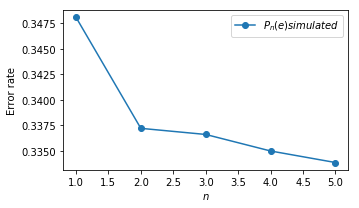

In [6]:
%%time

from scipy.stats import triang


def run_simulation(num_samples_from_each, simulations=10000, random_state=42):
    """
    Generate samples from each distribution. Check error rate.
    """
    np.random.seed(random_state)
    
    if num_samples_from_each == 0:
        return 0.5
    
    # Set up distributions
    x_dist = triang(loc=0, scale=1, c=1)  # This is p(x|w_1)
    y_dist = triang(loc=0, scale=1, c=0)  # This is p(x|w_2)
    
    n = num_samples_from_each
    x_value = x_dist.rvs(size=(simulations, 1))
    
    x_n_vals = x_dist.rvs(size=(simulations, n))
    y_n_vals = y_dist.rvs(size=(simulations, n))
    
    closest_x = np.min(np.abs(x_value - x_n_vals), axis=1).reshape(-1, 1)
    closest_y = np.min(np.abs(x_value - y_n_vals), axis=1).reshape(-1, 1)
    
    errors = np.argmin(np.hstack((closest_x, closest_y)), axis=1)
    
    return errors.sum() / simulations


plt.figure(figsize=FIGSIZE) 

# Simulation
n = [1, 2, 3, 4, 5]
P_e_sim = [run_simulation(k, simulations=100_000) for k in n]

# Analytical
P_e = lambda n: 1/3 + 1/((n+1) * (n+3)) + 1/(2 * (n+2) * (n+3))
P_e_true = [P_e(k) for k in n]

plt.plot(n, P_e_sim, '-o', label='$P_n(e) simulated$')
#plt.plot(n, P_e_true, '-o', label='$P_n(e) true$')

plt.ylabel('Error rate')
plt.xlabel('$n$')
plt.legend()
plt.tight_layout()
plt.savefig('duda_ch4_prob13_sim.pdf')

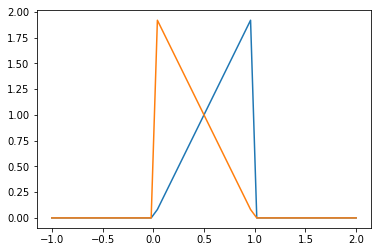

In [7]:
x_dist = triang(loc=0, scale=1, c=1)  # This is p(x|w_1)
y_dist = triang(loc=0, scale=1, c=0)  # This is p(x|w_2)

x = np.linspace(-1, 2)

plt.plot(x, x_dist.pdf(x))

plt.plot(x, y_dist.pdf(x))

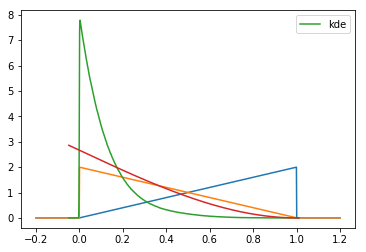

In [8]:
dist = triang(loc=0, scale=1, c=1)  # This is p(x|w_1)
dist2 = triang(loc=0, scale=1, c=0)  # This is p(x|w_2)


import numpy as np
x = np.linspace(-0.2, 1.2, num= 2**10)

plt.plot(x, dist.pdf(x))
plt.plot(x, dist2.pdf(x))

data = dist.rvs(size=(100000, 2), random_state=None)

dists = np.abs(dist.rvs(size=(1000000), random_state=None) - dist2.rvs(size=(1000000), random_state=None))

# minimum of two points
n = 10**7
x = dist.rvs(size=(n), random_state=1)
dists2 = np.abs(x - dist.rvs(size=(n), random_state=2))
dists3 = np.abs(x - dist.rvs(size=(n), random_state=3))
dists5 = np.abs(x - dist.rvs(size=(n), random_state=4))
dists4 = np.minimum(np.minimum(dists3, dists2), dists5)
#data = np.random.rand(1000000, 2)

#dists = np.abs(data[:, 0] - data[:, 1]).ravel()

from KDEpy import FFTKDE


x, y = FFTKDE(bw=0.001).fit(dists4)()

plt.plot(x, y, label='kde')
plt.legend()
g = (4/3)*(x*x*x - 3*x + 2)
#plt.plot(x, g)
G = (4/3) * (x**4/4 - (3/2)*x*x + 2*x)
plt.plot(x, 1* (1 - G)**0*g)


#plt.plot(x, np.cumsum(y)/ np.sum(y))

#x, y = FFTKDE(bw=0.002).fit(dists2)()
#plt.plot(x, np.cumsum(y)/ np.sum(y))

In [9]:
dist = triang(loc=0, scale=1, c = 1)
dist2 = triang(loc=0, scale=1, c = 0)

n = 1000000
x = dist.rvs(n)
x_1 = dist.rvs(n)
y_1 = dist2.rvs(n)

dists = np.vstack((np.abs(x - x_1), np.abs(x - y_1)))

dists.shape

np.sum(dists.argmin(axis=0)) / n

0.350061

In [10]:
P = lambda n: 1/ 3 + 1/((n+1) * (n+3)) + 1/(2*(n+2) * (n+3))

P(1)

0.5

## Problem 5.27

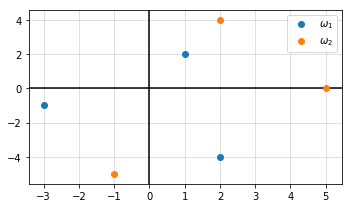

In [11]:
omega1 = np.array([[1, 2], [2, -4], [-3, -1]])
omega2 = np.array([[2, 4], [-1, -5], [5, 0]])

plt.figure(figsize=FIGSIZE)

# Plot the data
plt.scatter(omega1[:, 0], omega1[:, 1], label='$\omega_1$', zorder=15)
plt.scatter(omega2[:, 0], omega2[:, 1], label='$\omega_2$', zorder=15)

plt.grid(True, alpha=0.5, zorder=-15)
plt.legend()
plt.tight_layout()
plt.axhline(y=0, color='k')
plt.axvline(x=0, color='k')
plt.savefig('duda_ch5_prob27.pdf')

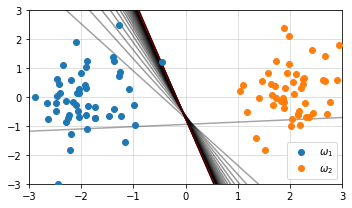

In [12]:
def modified_ho_kashyap(Y, a=None, b=None, eta=0.001, b_min=10e-1, 
                        max_iter=50, random_state=123):
    """
    The modified Ho-Kashyap algorithm for linear inequalities.
    
    See chapter 5 of Pattern Recognition by Duda et al.
    
    The matrix Y should have a first column of +/- 1.
    """
    # Get the shape of Y to possibly determine a and b
    m, d = Y.shape
    
    # If the variables a, b are None, they are set to random variables
    np.random.seed(random_state)
    a = a or np.random.randn(d)
    b = b or np.abs(np.random.randn(m))
    yield a, b  # Yield for plotting. Remove for proper implementation.
    
    # Moore-Penrose pseudo-inverse
    # computed outside loop for speed
    Y_inv = np.linalg.pinv(Y)
    
    for i in range(max_iter):
        #print(f'----------  {i}  ----------')
        
        # The algorithm is based on Algorithm 12,
        # chapter 5 in Pattern Recognition by
        # Duda et al. Page 254
        e = np.dot(Y, a) - b
        e_plus = (e + np.abs(e))
        b = b + eta * (e + np.abs(e))
        a = np.dot(Y_inv,  b)
        
        yield a, b  # Yield for plotting. Remove for proper implementation.
        
        # The code below will implement proper stopping criteria.
        # It was removed here, to facilitate plotting of convergence
        # instead.
        
        #if np.all(np.abs(e) < b_min):
        #    return a, b

    #return a, b

# Data points from the problem
omega1 = np.array([[1, 2], [2, -4], [-3, -1]])
omega2 = np.array([[2, 4], [-1, -5], [5, 0]])

# Data points from two normal distributions
data_points = 50
omega1 = np.hstack((np.random.randn(data_points, 1)/2 - 2, np.random.randn(data_points, 1)))
omega2 = np.hstack((np.random.randn(data_points, 1)/2 + 2, np.random.randn(data_points, 1)))

# Create the matrix Y
m, d = omega1.shape
n, d = omega2.shape
Y1 = +np.hstack((np.ones((m, 1)), omega1))
Y2 = -np.hstack((np.ones((n, 1)), omega2))
Y = np.vstack((Y1, Y2))

plt.figure(figsize=FIGSIZE)
plt.scatter(omega1[:, 0], omega1[:, 1], label='$\omega_1$', zorder=15)
plt.scatter(omega2[:, 0], omega2[:, 1], label='$\omega_2$', zorder=15)

max_iter = 25
generator = modified_ho_kashyap(Y, eta=0.4, 
                                b_min=0.001, 
                                max_iter=max_iter,
                                random_state=426870)

for i, (a, b) in enumerate(generator, 1):
    x = np.linspace(-10, 10)
    y = -(a[0] + a[1] * x) / a[2]

    color = '-r' if i == max_iter else '-k'
    alpha = 1 if i == max_iter else (10  + i/2)/30
    plt.plot(x, y, color, alpha = alpha)
    
plt.xlim([-3, 3])
plt.ylim([-3, 3])
plt.grid(True, alpha=0.5, zorder=-15)
plt.legend()
plt.tight_layout()
plt.savefig('duda_ch5_prob27_b.pdf')

## Problem 5.32

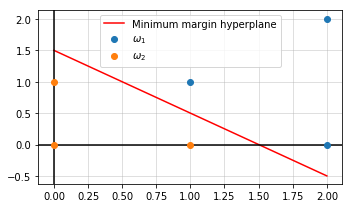

In [13]:
omega1 = np.array([[1, 1], [2, 2], [2, 0]])
omega2 = np.array([[0, 0], [1, 0], [0, 1]])

plt.figure(figsize=FIGSIZE)

# Plot the data
plt.scatter(omega1[:, 0], omega1[:, 1], label='$\omega_1$', zorder=15)
plt.scatter(omega2[:, 0], omega2[:, 1], label='$\omega_2$', zorder=15)

# By inspection, the minimum margin hyperplane is
# given by 1.5 - x
x = np.linspace(0, 2)
y = 1.5 - x
plt.plot(x, y, 'r', label = 'Minimum margin hyperplane')

plt.grid(True, alpha=0.5, zorder=-15)
plt.legend()
plt.tight_layout()
plt.axhline(y=0, color='k')
plt.axvline(x=0, color='k')
plt.savefig('duda_ch5_prob32.pdf')

In [14]:
round(np.sqrt(2)/4, 4)

0.3536

## Problem 7.4

In [15]:
T = lambda N: 2**(N-1) * 10**(-8)

for N in [100, 1000]:
    print(N, T(N))

100 6.338253001141147e+21
1000 5.357543035931337e+292


## Problem 7.5

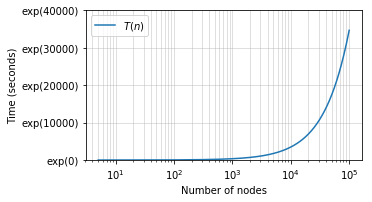

In [16]:
T = lambda N: 2**(N - 2) * N * (N - 1) * 10**(-10)
logT = lambda N: (N - 2) * np.log(2) + np.log(N) + np.log(N - 1) + -10 * np.log(10)


N = np.arange(5, 10**5)
times = logT(N)

plt.figure(figsize=FIGSIZE) 

plt.semilogx(N, times, label='$T(n)$')


plt.ylabel('Time (seconds)')
plt.xlabel('Number of nodes')
plt.grid(True, which="both",alpha=0.5, zorder=-15)
plt.legend()
plt.tight_layout(pad=1.4)

locs, labels = plt.yticks()
plt.yticks(locs, ['exp({})'.format(l.get_text()) for l in labels])
plt.ylim([0, plt.ylim()[1]])

plt.savefig('duda_ch7_prob5.pdf')

In [17]:
# Problem 7.5 c)

from scipy.optimize import brenth

for time in [3600 * 24, 3600 * 24 * 365, 3600 * 24 * 365 * 100]:

    function = lambda x: logT(x) - np.log(time)
    print(scipy.optimize.brenth(function, 2, 100))

40.94263498719578
48.9340326093759
55.22547270750068


## Computer exercise 7.2

In [18]:
n = 3

W = np.random.randn(n, n)
W = W.T @ W

for s in sorted(itertools.product(*([-1, 1] for i in range(n))), key=lambda s: np.array(s).T @ W @ np.array(s)):
    s = np.array(s)
    E = s.T @ W @ s
    print(s, E)

[-1  1  1] 3.907959380034894
[ 1 -1 -1] 3.907959380034894
[-1  1 -1] 5.3430369548649175
[ 1 -1  1] 5.3430369548649175
[-1 -1 -1] 6.07837553468338
[1 1 1] 6.07837553468338
[-1 -1  1] 7.41405483828833
[ 1  1 -1] 7.41405483828833


## Problem 9.34

MLE for normal model: (0.5142857142857143, 0.22314999074019012)
MLE for uniform model: (0.2, 0.7)


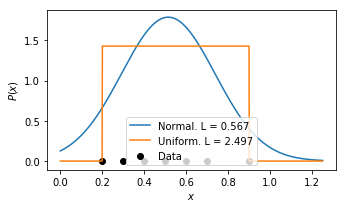

In [19]:
from scipy.stats import norm, uniform

D = np.array([0.2, 0.5, 0.4, 0.3, 0.9, 0.7, 0.6])

print('MLE for normal model:', norm.fit(D))
print('MLE for uniform model:', uniform.fit(D))

plt.figure(figsize=FIGSIZE) 

plt.scatter(D, np.zeros_like(D), label='Data', color='k')
x = np.linspace(0, 1.25, num=2**10)

plt.plot(x, norm(*norm.fit(D)).pdf(x), 
         label=f'Normal. L = {round(np.log(norm(*norm.fit(D)).pdf(D)).sum(), 3)}')

plt.plot(x, uniform(*uniform.fit(D)).pdf(x), 
         label=f'Uniform. L = {round(np.log(uniform(*uniform.fit(D)).pdf(D)).sum(), 3)}')

plt.ylabel('$P(x)$')
plt.xlabel('$x$')
plt.legend()
plt.tight_layout()
plt.savefig('duda_ch9_prob34.pdf')

## Problem 9.37

In [139]:
from scipy.stats import binom

plt.figure(figsize=FIGSIZE)
alpha = 0.05  # Confidence interval

for n in [10]:
    
    to_plot_high = []
    to_plot_low = []

    for k in range(0, n + 1)
        p = p / k

        # Use the ppf (Percent point function)
        # (inverse cumulative probability density function)
        # to find the limits of \hat{p} given a true value of p
        if p == 0:
            low_p_hat = 0
        else:
            low_p_hat = binom(n=n, p=p).ppf(alpha/2) / n
            
        if p == 1:
            high_p_hat = 1
        else:
            high_p_hat = binom(n=n, p=p).ppf(1 - alpha/2) / n
            
        # Print information (debugging)
        # print(p, low_p_hat)
        # print(f'When n={n} and p={p}, the lower bound is {low_p_hat}.')

        to_plot_high.append((low_p_hat, p))
        to_plot_low.append((high_p_hat, p))

    plt.plot([x for (x, y) in to_plot_high], [y for (x, y) in to_plot_high], 
             label=f'n = {n}', 
             color=plt.get_cmap('hot')(0.1 + np.sqrt(n) / 75))

    plt.plot([x for (x, y) in to_plot_low], [y for (x, y) in to_plot_low],
            color=plt.get_cmap('hot')(0.1 + np.sqrt(n) / 75))
    
plt.ylabel('$p$')
plt.xlabel('$\hat{p}$')
plt.legend(fontsize=8)
plt.grid(True)
plt.tight_layout()
plt.savefig(f'duda_ch9_prob37_k{k}.pdf')

SyntaxError: invalid syntax (<ipython-input-139-fe68d16e380f>, line 11)

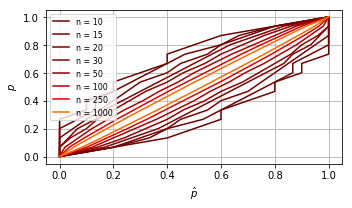

In [140]:
from scipy.stats import binom

plt.figure(figsize=FIGSIZE)
alpha = 0.05  # Confidence interval

for n in [10, 15, 20, 30, 50, 100, 250, 1000]:
    
    to_plot_high = []
    to_plot_low = []

    k = 15
    for p in range(0, k + 1):
        p = p / k

        # Use the ppf (Percent point function)
        # (inverse cumulative probability density function)
        # to find the limits of \hat{p} given a true value of p
        if p == 0:
            low_p_hat = 0
        else:
            low_p_hat = binom(n=n, p=p).ppf(alpha/2) / n
            
        if p == 1:
            high_p_hat = 1
        else:
            high_p_hat = binom(n=n, p=p).ppf(1 - alpha/2) / n
            
        # Print information (debugging)
        # print(p, low_p_hat)
        # print(f'When n={n} and p={p}, the lower bound is {low_p_hat}.')

        to_plot_high.append((low_p_hat, p))
        to_plot_low.append((high_p_hat, p))

    plt.plot([x for (x, y) in to_plot_high], [y for (x, y) in to_plot_high], 
             label=f'n = {n}', 
             color=plt.get_cmap('hot')(0.1 + np.sqrt(n) / 75))

    plt.plot([x for (x, y) in to_plot_low], [y for (x, y) in to_plot_low],
            color=plt.get_cmap('hot')(0.1 + np.sqrt(n) / 75))
    
plt.ylabel('$p$')
plt.xlabel('$\hat{p}$')
plt.legend(fontsize=8)
plt.grid(True)
plt.tight_layout()
plt.savefig(f'duda_ch9_prob37_k{k}.pdf')

## Problem 10.12

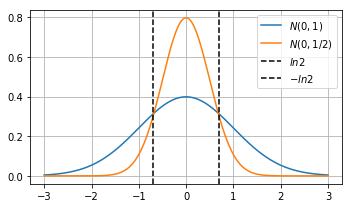

In [16]:
mu1, sigma1= 0, 1
mu2, sigma2= 0, 1/2

dist1 = stats.norm(loc=mu1, scale=sigma1)
dist2 = stats.norm(loc=mu2, scale=sigma2)


x = np.linspace(-3, 3, num=2**8)

plt.figure(figsize=FIGSIZE)
plt.plot(x, dist1.pdf(x), label='$N(0, 1)$')
plt.plot(x, dist2.pdf(x), label='$N(0, 1/2)$')
plt.axvline(x=np.log(2), color='k', ls='--', label='$ln 2$')
plt.axvline(x=-np.log(2), color='k', ls='--', label='$-ln 2$')
#plt.scatter([x_star], [0], label='$x^*$', marker='|')
#plt.plot(x, bayes_error, '--', label='$P(error)$')
plt.legend()
plt.grid()
plt.tight_layout()
plt.savefig('duda_ch10_prob12.pdf')